In [1]:
import pandas as pd
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
import sklearn
import seaborn as sns
import colorcet as cc
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tsai_gina import *
from tsai.all import *
computer_setup()

/opt/conda/envs/Base/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


os              : Linux-5.13.0-52-generic-x86_64-with-glibc2.10
python          : 3.8.16
tsai            : 0.3.6
fastai          : 2.7.12
fastcore        : 1.5.29
torch           : 1.13.1+cu117
cpu cores       : 24
threads per cpu : 2
RAM             : 1007.78 GB
GPU memory      : N/A


In [48]:
def get_2d_embeddings_from_file(file):
    embeddings=pd.read_csv(file, compression='zip',index_col=[0,1])
    embeddings=embeddings.query('instance_id in @test_ids')
    
    tsne=TSNE(n_components=2)
    tsne_embeddings_2d=pd.DataFrame(tsne.fit_transform(embeddings.dropna()) , columns=['x','y'], index=embeddings.index)
    return tsne_embeddings_2d
    

In [86]:
def plot_embeddings(embeddings, save_in_file, col_name):
    sns.set(font_scale=1.1)
    plt.figure(figsize=(22,24))
    embeddings['style']=embeddings['problem_id'].copy()
    g = sns.FacetGrid(embeddings, col_wrap=2, col=col_name,hue='problem_id', palette=sns.color_palette(cc.glasbey, n_colors=24), legend_out=True)
    
    # map the scatterplot function to each subplot
    g.map(sns.scatterplot, 'x', 'y', alpha=0.7,  style=embeddings['problem_id'])
    plt.tight_layout()
    plt.xticks([]) 
    plt.yticks([])
    g.set_xlabels('')
    g.set_ylabels('')
    plt.tight_layout()
    #g.add_legend(title="Problem class")

    plt.savefig(save_in_file,bbox_inches='tight')

In [189]:
def plot_embeddings_agg(embeddings, save_in_file, col_name):
    fig, axes = plt.subplots(2,2, figsize=(6,7))
    sns.set(font_scale=1.1)
    for agg_index, aggregation in enumerate(['min','max','std','mean']):
        agg_emb=embeddings.query('aggregation==@aggregation')
        ax=axes[int(agg_index/2)][agg_index%2]
        g=sns.scatterplot(agg_emb, x='x', y='y', hue='problem_id', style='problem_id', alpha=0.7, palette=sns.color_palette(cc.glasbey, n_colors=24), ax=ax)
        ax.set_title(f'Aggregation = {aggregation}')
        ax.xaxis.label.set_visible(False)
        ax.yaxis.label.set_visible(False)
        ax.set(yticklabels=[]) 
        ax.set(xticklabels=[]) 
        ax.legend().remove()
        h, l = ax.get_legend_handles_labels()
        print(h,l)
    fig.legend(h, l,bbox_to_anchor=(1.22,0.985), title='Problem class')
   
    plt.tight_layout()
    #g.add_legend(title="Problem class")

    plt.savefig(save_in_file,bbox_inches='tight')

In [178]:
fold=1
dimension=20
test_ids=pd.read_csv(f'folds/problem_classification_999_instances/test_{fold}.csv', index_col=0)['0'].values
all_embeddings=pd.DataFrame()
for aggregation in ['min','max','std','mean']:
    file=f'results_aggregations/problem_classification_stats/dim_{dimension}_instances_999_samples_50_fold_{fold}_n_heads_1_n_layers_1_d_model_30_d_k_None_d_v_None_aggregations_{aggregation}/embeddings.csv'
    tsne_embeddings_2d=get_2d_embeddings_from_file(file)
    tsne_embeddings_2d['aggregation']=aggregation
    all_embeddings=pd.concat([all_embeddings, tsne_embeddings_2d])

    

In [182]:
24*24*4

2304

[<matplotlib.collections.PathCollection object at 0x7fd82bdeafa0>, <matplotlib.collections.PathCollection object at 0x7fd82bde24c0>, <matplotlib.collections.PathCollection object at 0x7fd82bde2940>, <matplotlib.collections.PathCollection object at 0x7fd82bdea9a0>, <matplotlib.collections.PathCollection object at 0x7fd82bdea0a0>, <matplotlib.collections.PathCollection object at 0x7fd82bde5160>, <matplotlib.collections.PathCollection object at 0x7fd829c35130>, <matplotlib.collections.PathCollection object at 0x7fd829c35580>, <matplotlib.collections.PathCollection object at 0x7fd829c359d0>, <matplotlib.collections.PathCollection object at 0x7fd829c35e50>, <matplotlib.collections.PathCollection object at 0x7fd829c1d310>, <matplotlib.collections.PathCollection object at 0x7fd82bdeaf40>, <matplotlib.collections.PathCollection object at 0x7fd829c1d7f0>, <matplotlib.collections.PathCollection object at 0x7fd829c1dc40>, <matplotlib.collections.PathCollection object at 0x7fd829c1dfd0>, <matplotl

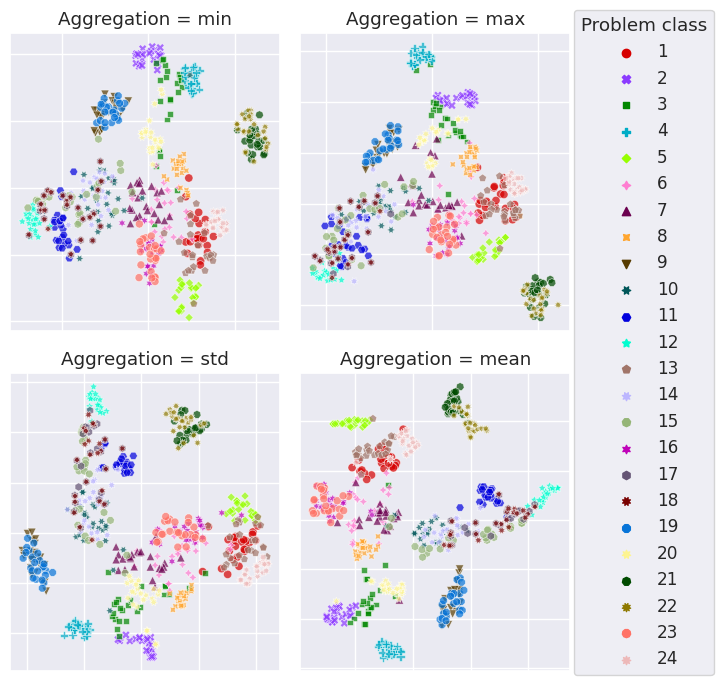

In [190]:
plot_embeddings_agg(all_embeddings.query('instance_id<125').reset_index(), f'figures/embeddings_by_aggregation_dim_{dimension}.pdf', 'aggregation')

<Figure size 2200x2400 with 0 Axes>

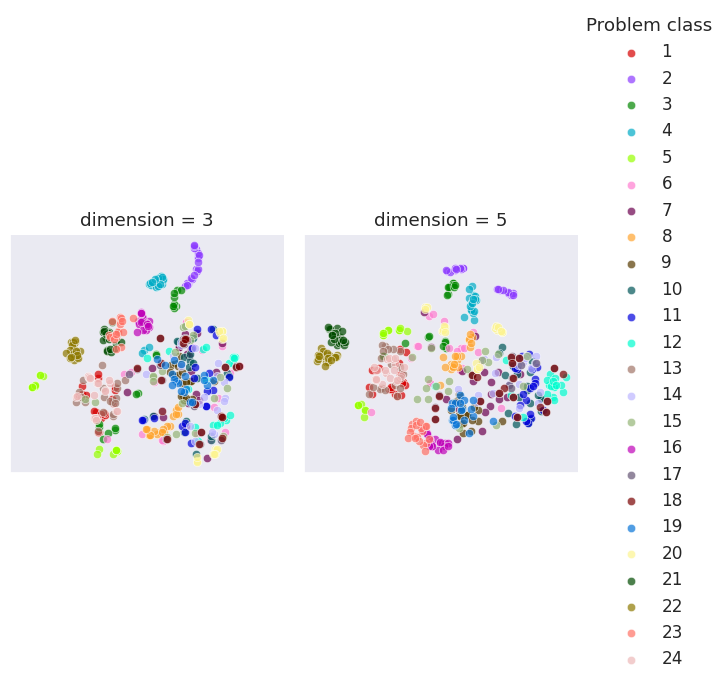

In [60]:
all_embeddings=pd.DataFrame()
fold=0
for dimension in [3,5,10]:
    file=f'results_downstream/problem_classification_stats/dim_{dimension}_instances_999_samples_50_fold_{fold}_n_heads_1_n_layers_1_d_model_30_d_k_None_d_v_None_aggregations_all/embeddings.csv'
    tsne_embeddings_2d=get_2d_embeddings_from_file(file)
    tsne_embeddings_2d['dimension']=dimension
    all_embeddings=pd.concat([all_embeddings, tsne_embeddings_2d])
plot_embeddings(all_embeddings.query('instance_id<120').reset_index(), f'figures/embeddings_by_dimension.pdf', 'dimension')